In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1168, 81)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

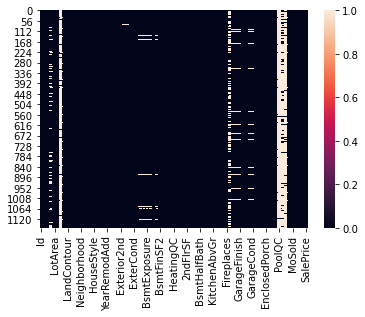

In [9]:
sns.heatmap(df.isnull())

In [10]:
#treating the null values
df=df.fillna(method='ffill')

In [11]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      1
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,71.203085,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.940925,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,25.303355,8957.442311,1.390153,1.124343,30.145255,20.785185,182.149709,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# As we can see here ,there is lots if diffrence between the Std and mean ,so we can say there is skewness present in tha data
#In the further steps we will remove the skewness 

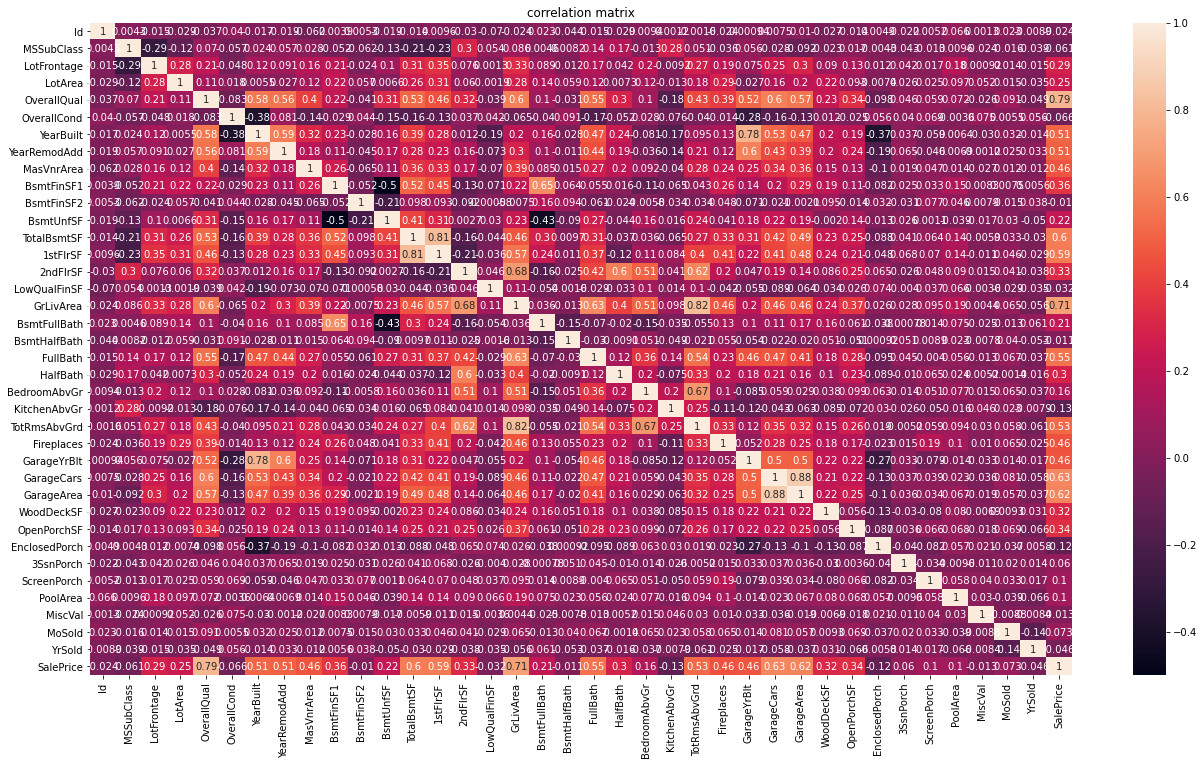

In [14]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()


In [15]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.015416,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.061746,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.285132,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028329,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.015416,-0.285132,1.000000,0.284968,0.214886,-0.047626,0.122288,0.091246,0.164448,0.205660,...,0.089623,0.130035,0.012382,0.042312,0.016765,0.175455,0.000920,0.013567,-0.015083,0.290071
LotArea,-0.029212,-0.124151,0.284968,1.000000,0.107188,0.017513,0.005506,0.027228,0.119917,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.214886,0.107188,1.000000,-0.083167,0.575800,0.555945,0.404812,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.047626,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135539,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.122288,0.005506,0.575800,-0.377731,1.000000,0.592829,0.320130,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.091246,0.027228,0.555945,0.080669,0.592829,1.000000,0.179859,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.061746,0.028329,0.164448,0.119917,0.404812,-0.135539,0.320130,0.179859,1.000000,0.263590,...,0.152493,0.128496,-0.102668,0.018963,0.047026,0.013738,-0.027390,0.011789,-0.012122,0.461337
BsmtFinSF1,0.003868,-0.052236,0.205660,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263590,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


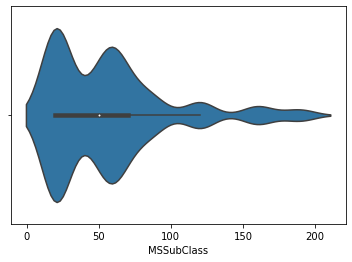

In [16]:
#now we performing some eda process
#univariate analysis
sns.violinplot(x="MSSubClass",data=df)
plt.show()

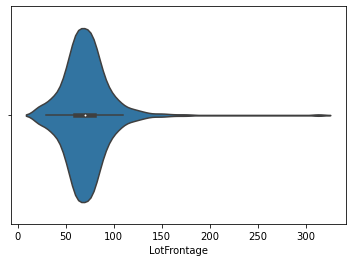

In [17]:
sns.violinplot(x="LotFrontage",data=df)
plt.show()

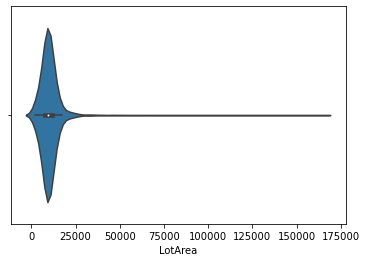

In [18]:
sns.violinplot(x="LotArea",data=df)
plt.show()

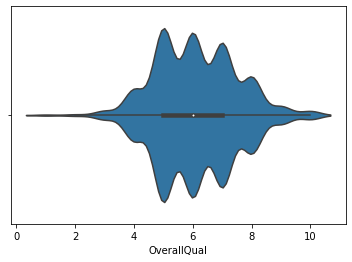

In [19]:
sns.violinplot(x="OverallQual",data=df)
plt.show()

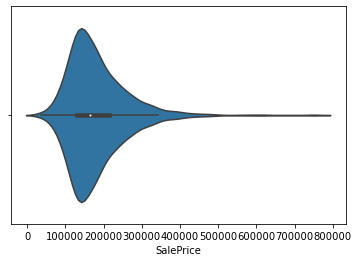

In [20]:
sns.violinplot(x="SalePrice",data=df)
plt.show()

<AxesSubplot:>

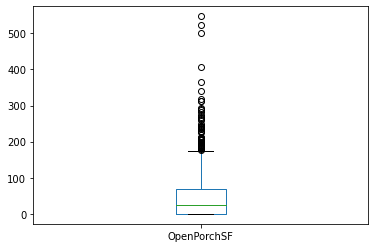

In [21]:
df['OpenPorchSF'].plot.box()

<AxesSubplot:>

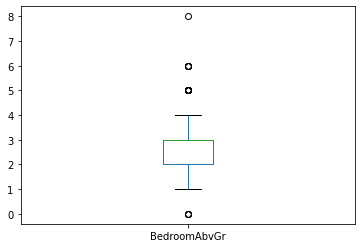

In [22]:
df['BedroomAbvGr'].plot.box()

<AxesSubplot:>

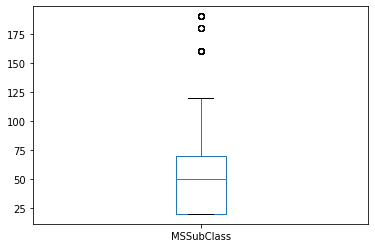

In [23]:
df['MSSubClass'].plot.box()

<AxesSubplot:>

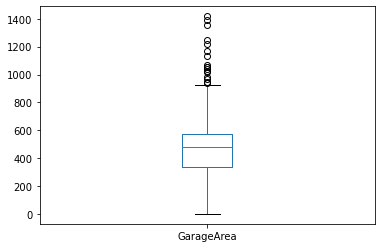

In [24]:
df['GarageArea'].plot.box()

<AxesSubplot:>

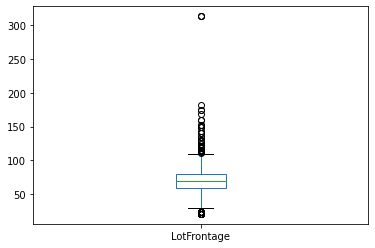

In [25]:
df['LotFrontage'].plot.box()

<AxesSubplot:>

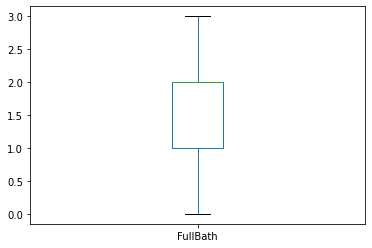

In [26]:
df['FullBath'].plot.box()

<AxesSubplot:>

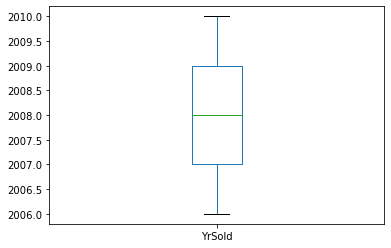

In [27]:
df['YrSold'].plot.box()

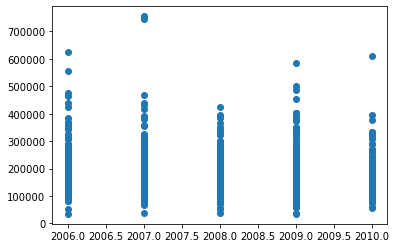

In [28]:
#bivariate analysis
plt.scatter(df['YrSold'],df['SalePrice'])
plt.show()

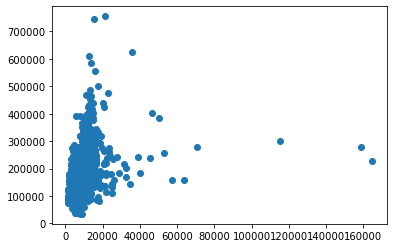

In [29]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.show()

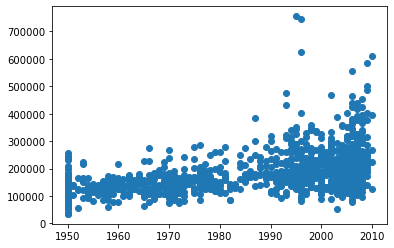

In [30]:
plt.scatter(df['YearRemodAdd'],df['SalePrice'])
plt.show()

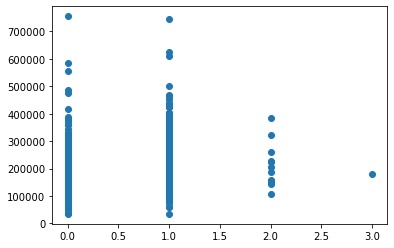

In [31]:
plt.scatter(df['BsmtFullBath'],df['SalePrice'])
plt.show()

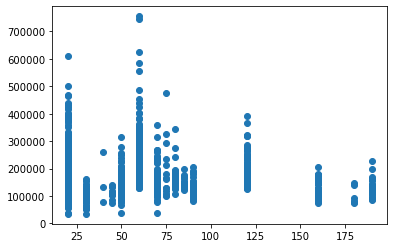

In [32]:
plt.scatter(df['MSSubClass'],df['SalePrice'])
plt.show()

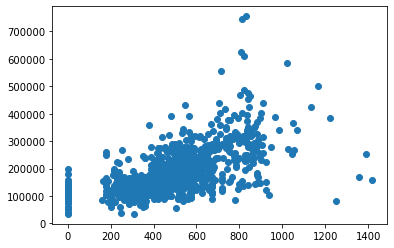

In [33]:
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.show()

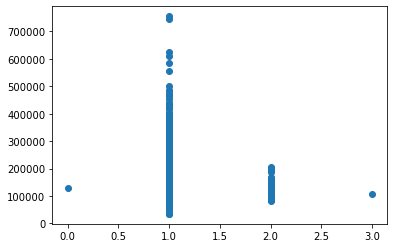

In [34]:
plt.scatter(df['KitchenAbvGr'],df['SalePrice'])
plt.show()

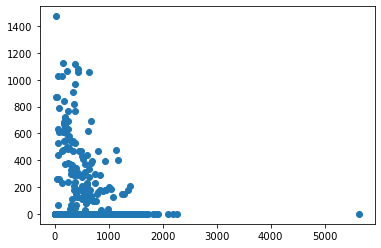

In [35]:
plt.scatter(df['BsmtFinSF1'],df['BsmtFinSF2'])
plt.show()

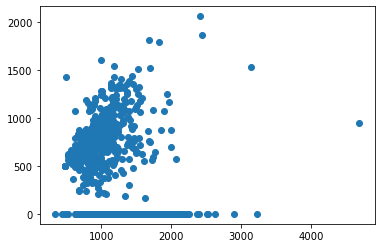

In [36]:
plt.scatter(df['1stFlrSF'],df['2ndFlrSF'])
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1167 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1137 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["MSZoning"]=le.fit_transform(df["MSZoning"])

In [39]:
df["Street"]=le.fit_transform(df["Street"])

In [40]:
df["LotShape"]=le.fit_transform(df["LotShape"])

In [41]:
df["LandContour"]=le.fit_transform(df["LandContour"])

In [42]:
df["Utilities"]=le.fit_transform(df["Utilities"])

In [43]:
df["LotConfig"]=le.fit_transform(df["LotConfig"])

In [44]:
df["LandSlope"]=le.fit_transform(df["LandSlope"])

In [45]:
df["Neighborhood"]=le.fit_transform(df["Neighborhood"])

In [46]:
df["Condition1"]=le.fit_transform(df["Condition1"])

In [47]:
df["Condition2"]=le.fit_transform(df["Condition2"])

In [48]:
df["BldgType"]=le.fit_transform(df["BldgType"])

In [49]:
df["HouseStyle"]=le.fit_transform(df["HouseStyle"])

In [50]:
df["RoofStyle"]=le.fit_transform(df["RoofStyle"])

In [51]:
df["RoofMatl"]=le.fit_transform(df["RoofMatl"])

In [52]:
df["Exterior1st"]=le.fit_transform(df["Exterior1st"])

In [53]:
df["Exterior2nd"]=le.fit_transform(df["Exterior2nd"])

In [54]:
df["MasVnrType"]=le.fit_transform(df["MasVnrType"])

In [55]:
df["ExterQual"]=le.fit_transform(df["ExterQual"])

In [56]:
df["ExterCond"]=le.fit_transform(df["ExterCond"])

In [57]:
df["Foundation"]=le.fit_transform(df["Foundation"])

In [58]:
df["BsmtQual"]=le.fit_transform(df["BsmtQual"])

In [59]:
df["BsmtCond"]=le.fit_transform(df["BsmtCond"])

In [60]:
df["BsmtExposure"]=le.fit_transform(df["BsmtExposure"])

In [61]:
df["BsmtFinType1"]=le.fit_transform(df["BsmtFinType1"])

In [62]:
df["BsmtFinType2"]=le.fit_transform(df["BsmtFinType2"])

In [63]:
df["Heating"]=le.fit_transform(df["Heating"])

In [64]:
df["HeatingQC"]=le.fit_transform(df["HeatingQC"])

In [65]:
df["CentralAir"]=le.fit_transform(df["CentralAir"])

In [66]:
df["Electrical"]=le.fit_transform(df["Electrical"])

In [67]:
df["Functional"]=le.fit_transform(df["Functional"])

In [68]:
df["FireplaceQu"]=le.fit_transform(df["FireplaceQu"])

In [69]:
df["GarageType"]=le.fit_transform(df["GarageType"])

In [70]:
df["GarageFinish"]=le.fit_transform(df["GarageFinish"])

In [71]:
df["GarageQual"]=le.fit_transform(df["GarageQual"])

In [72]:
df["GarageCond"]=le.fit_transform(df["GarageCond"])

In [73]:
df["PavedDrive"]=le.fit_transform(df["PavedDrive"])

In [74]:
df["KitchenQual"]=le.fit_transform(df["KitchenQual"])

In [75]:
df["SaleType"]=le.fit_transform(df["SaleType"])

In [76]:
df["SaleCondition"]=le.fit_transform(df["SaleCondition"])

In [77]:
df.drop('Alley',axis=1,inplace=True)

In [78]:
df.drop('Fence',axis=1,inplace=True)

In [79]:
df.drop('MiscFeature',axis=1,inplace=True)

In [80]:
df.drop('PoolQC',axis=1,inplace=True)

In [81]:
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.725576
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 77, dtype: float64

In [82]:
df.dropna(inplace=True)

In [83]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,889,20,3,95.0,15865,1,0,3,0,4,...,0,0,224,0,0,10,2007,8,4,268000
2,793,60,3,92.0,9920,1,0,3,0,1,...,0,0,0,0,0,6,2007,8,4,269790
3,110,20,3,105.0,11751,1,0,3,0,4,...,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,105.0,16635,1,0,3,0,2,...,0,0,0,0,0,6,2009,8,4,215000
5,1197,60,3,58.0,14054,1,0,3,0,4,...,0,0,0,0,0,11,2006,6,5,219210


In [84]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

In [85]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,889,20,3,95.0,15865,1,0,3,0,4,...,207,0,0,224,0,0,10,2007,8,4
2,793,60,3,92.0,9920,1,0,3,0,1,...,130,0,0,0,0,0,6,2007,8,4
3,110,20,3,105.0,11751,1,0,3,0,4,...,122,0,0,0,0,0,1,2010,0,4
4,422,20,3,105.0,16635,1,0,3,0,2,...,0,0,0,0,0,0,6,2009,8,4
5,1197,60,3,58.0,14054,1,0,3,0,4,...,17,0,0,0,0,0,11,2006,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,45.0,9819,1,0,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1164,554,20,3,67.0,8777,1,3,3,0,4,...,96,0,0,0,0,0,5,2009,8,4
1165,196,160,3,24.0,2280,1,3,3,0,2,...,0,0,0,0,0,0,7,2009,8,4
1166,31,70,0,50.0,8500,1,3,3,0,4,...,54,172,0,0,0,0,7,2008,8,4


In [86]:
y

1       268000
2       269790
3       190000
4       215000
5       219210
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1167, dtype: int64

In [87]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [88]:
df_new.skew()

Id              -0.268593
MSSubClass       0.064406
MSZoning         0.232587
LotFrontage      0.086998
LotArea          0.000000
                   ...   
MiscVal          4.988688
MoSold          -0.035347
YrSold           0.000000
SaleType        -2.066305
SaleCondition   -0.354031
Length: 76, dtype: float64

In [89]:
#so here we remove the skewness present in dataset from the power transform method..now all the skewness is remove 

In [90]:
x=df_new

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=137)

In [92]:
x_train.shape

(875, 76)

In [93]:
y_train.shape

(875,)

In [94]:
x_test.shape

(292, 76)

In [95]:
y_test.shape

(292,)

In [96]:
lm=LinearRegression()

In [97]:
lm.fit(x_train,y_train)

LinearRegression()

In [98]:
lm.coef_

array([-6.06303803e+02, -2.81924088e+03,  8.03570274e+02,  1.63537237e+03,
       -5.28456452e+16,  4.79354828e+02, -1.24123778e+03,  2.58314890e+03,
        6.42128230e+16, -1.35200000e+03,  1.05900000e+03,  1.51500000e+03,
       -1.24181250e+03, -1.59400000e+03, -4.32100000e+03, -1.86600000e+03,
        1.70430000e+04,  5.68700000e+03, -4.45500000e+02, -5.56000000e+02,
        4.62900000e+03,  1.32165000e+04,  1.21600000e+03, -5.45600000e+03,
        1.63600000e+03, -8.18000000e+02, -4.52600000e+03, -1.30000000e+02,
        3.18450000e+03, -6.95350000e+03,  1.27600000e+03, -4.91200000e+03,
        1.66000000e+03,  7.59400000e+03, -6.22800000e+03, -7.30800000e+03,
       -4.66600000e+03,  1.17000000e+04, -2.05600000e+03, -3.06400000e+03,
       -8.94000000e+02, -2.19400000e+03,  6.70510704e+10, -3.11000000e+02,
       -8.38000000e+02,  1.69770000e+04,  1.24000000e+03, -8.02000000e+02,
        3.15500000e+03,  5.15837500e+03, -1.70200000e+03, -1.21800000e+03,
       -7.87300000e+03,  

In [99]:
lm.intercept_

181302.73798603713

In [100]:
lm.score(x_train,y_train)

0.8258954622679024

In [101]:
#predict the values
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [195839.28326671 150509.8080367  118957.91312505 145190.94219061
 235704.16648492 155943.65485075  99857.2795393  242061.20696459
 177199.03069129 146006.76152588 252927.4235428  205413.92168361
 241506.75286528 196859.50550577 232953.2634285  217599.58581247
 212631.6064508   94322.8642982  173368.89746797 133938.01628724
 261164.83032769 185615.03742948 180132.29690185 154754.01806398
 198313.10078502 211876.36706139 230214.43176615 200863.14068327
 225266.55918146 336636.46828096 115814.55608624 185974.52361523
 228364.24365034 310625.51429956 273561.90453244 176941.40603643
 113624.66201068 263547.92252918 195440.55211925 289742.10095005
 117387.14953521 290080.45509125 199737.78229853 202820.26943836
 114290.58751125 129693.60374842 191685.34334433 196423.45496484
 277930.92710535 250943.81020941 135016.84844094 105437.10447166
 141377.68064843 214077.30705053 147175.59360649 197644.02881408
 106958.76674435 113245.90859127 277653.06610714 301481.92432793
 

In [102]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))

error:
mean absolute error: 22776.901459241748
mean squared error: 1052426207.685864


In [103]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8253045158394757


In [104]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8258965855986302

In [105]:
ls.coef_

array([ -606.65089081, -2823.19187881,   793.29313274,  1644.10027697,
           0.        ,   503.06189797, -1261.89757938,  2604.20383882,
           0.        , -1349.90947165,  1067.11731862,  1496.13544977,
       -1248.04817752, -1594.02435975, -4320.58171034, -1846.38538189,
       17027.64189617,  5678.78245498,  -432.69476389,  -559.49376255,
        4625.41599186, 13200.50551192,  1210.21523745, -5453.82179721,
        1607.19429637,  -838.23779014, -4534.2886653 ,  -132.87580452,
        3169.92979671, -6956.97711615,  1260.26964692, -4914.35992698,
        1686.76472948,  7611.00121822, -6223.66520008, -7288.78933552,
       -4659.93095344, 11716.80898943, -2062.9535365 , -3079.01558863,
        -900.54381062, -2188.9315485 ,     0.        ,  -310.64081699,
        -839.77889247, 16963.86050414,  1225.82368193,  -818.51278142,
        3152.87898335,  5136.03743662, -1706.32029428, -1223.51720831,
       -7869.21173646,  4825.77562309,  3231.83877713,  4488.30656873,
      

In [106]:
#try to minimize the coeficient variance
rd=Ridge(alpha=0.0001)
#rd=rodge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8258965855986156

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=137)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)


In [109]:
rf.score(x_train,y_train)

0.9746680132766946

In [111]:
import joblib
joblib.dump(rf,"rfmodelobj")


['rfmodelobj']